# Similarity of Programming Languages

In [1]:
import matplotlib.pyplot as plt
import collections
import pandas
import numpy
import json
import os

In [2]:
folder_personality = "personality"

In [3]:
all_files = os.listdir(folder_personality)

In [4]:
import scipy.spatial.distance as distance

In [5]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import wilcoxon

In [6]:
complete_data_by_lang = dict()
for filename in all_files:
    with open(os.path.join(folder_personality, filename)) as f:
        data = f.readlines()
        data = " ".join(data)
        data = json.loads(data)
    prog_lang = filename.split("_")[0]
    if prog_lang not in complete_data_by_lang:
        complete_data_by_lang[prog_lang] = collections.defaultdict(int)
    for i in range(5):
        complete_data_by_lang[prog_lang][data["personality"][i]["trait_id"]] = data["personality"][i]["raw_score"]
        for j in range(6):
            complete_data_by_lang[prog_lang][data["personality"][i]["children"][j]["trait_id"]] = data["personality"][i]["children"][j]["raw_score"]
    for i in range(8):
        preferences = data["consumption_preferences"][i]["consumption_preferences"]
        for preference in preferences:
            complete_data_by_lang[prog_lang][preference["consumption_preference_id"].split("_")[-1]] += preference["score"]
    for i in range(12):
        complete_data_by_lang[prog_lang][data["needs"][i]["trait_id"]] = data["needs"][i]["raw_score"]
    for i in range(5):
        complete_data_by_lang[prog_lang][data["values"][i]["trait_id"]] = data["values"][i]["raw_score"]

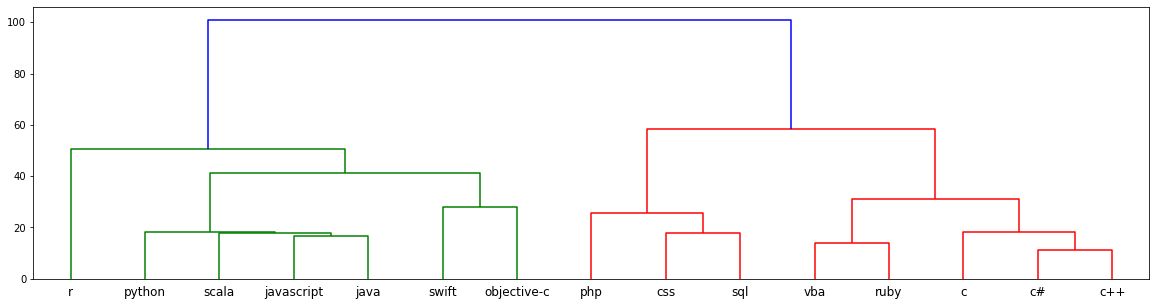

In [7]:
connections = linkage(pandas.DataFrame(complete_data_by_lang).T, "ward")
plt.figure(figsize=(20,5))
dendrogram(connections, labels=list(pandas.DataFrame(complete_data_by_lang).columns))
plt.show()